In [133]:
import pickle
import pandas as pd
import numpy as np
import os
import itertools as itt
import seaborn as sns

In [134]:
#DATA_FOLDER = "D:/Robin/simulated-nuclei/only_MT_markers"
#DATA_FOLDER = '../../simulated-nuclei_data/OB_pyscenic/full_genes_from_TFs_more'
DATA_FOLDER = '../../simulated-nuclei_data/Olfactory_Bulb/original_pipeline/'
sim_ex_mtx_fname = os.path.join(DATA_FOLDER,'sim_ex_mtx.p')
sim_table_fname = os.path.join(DATA_FOLDER,'sim_id_table.p')
sim_umap_fname = os.path.join(DATA_FOLDER,'simulation_combined_UMAP.p')

In [48]:
regulons_fname = '../../pyscenic_data/pyscenic_pipeline/regulons_nuc.p'

# Reading in data

In [135]:
sim_ex_mtx = pickle.load(open(sim_ex_mtx_fname,'rb'))

In [136]:
sim_table = pickle.load(open(sim_table_fname,'rb'))

In [137]:
sim_umap = pickle.load(open(sim_umap_fname,'rb'))

In [49]:
regulons = pickle.load(open(regulons_fname,'rb'))

In [138]:
sim_ex_mtx

Gnai3  Pbsn  Cdc45  H19  Scml2  Apoh  Narf  Cav2  Klf6  Scmh1  ...  \
0         0     0      0    0      0     0     0     0     0      0  ...   
1         0     0      0    0      0     0     0     0     0      0  ...   
2         0     0      0    0      0     0     0     0     0      0  ...   
3         0     0      0    0      0     0     0     0     0      0  ...   
4         0     0      0    0      0     0     0     0     0      0  ...   
...     ...   ...    ...  ...    ...   ...   ...   ...   ...    ...  ...   
2995      0     0      0    0      0     0     0     0     0      0  ...   
2996      0     0      0    0      0     0     0     0     0      0  ...   
2997      0     0      0    0      0     0     0     0     0      0  ...   
2998      0     0      0    0      0     0     0     0     0      0  ...   
2999      0     0      0    0      0     0     0     0     0      1  ...   

      Spag6l  March5  Sept9  Sept5  March4  Galr3  March3  9630013A20Rik  \
0          0       0      0      0       0      0       0              0   
1          0       0      0      0       0      0       0              0   
2          0       0      0      0       0      0       0              0   
3          0       0      0      0       0      0       0              0   
4          0       0      0      0       0      0       0              0   
...      ...     ...    ...    ...     ...    ...     ...            ...   
2995       0       0      0      0       0      0       0              0   
2996       0       0      0      0       0      0       0              0   
2997       0       0      0      0       0      0       0              0   
2998       0       0      0      0       0      0       0              0   
2999       0       0      0      0       0      0       0              0   

      Cnksr3  D330046F09Rik  
0          0              0  
1          0              0  
2          0              0  
3          0              0  
4          0              0  
...      ...            ...  
2995       0              0  
2996       0              0  
2997       0              0  
2998       0              0  
2999       0              0  

[3000 rows x 51935 columns]

In [139]:
sim_table

general_dataset specific_dataset
0                PCX            PCX_1
1                PCX            PCX_1
2                PCX            PCX_1
3                PCX            PCX_1
4                PCX            PCX_1
...              ...              ...
2995             AON            AON_3
2996             AON            AON_3
2997             AON            AON_3
2998             AON            AON_3
2999             AON            AON_3

[3000 rows x 2 columns]

In [140]:
sim_umap_df = pd.DataFrame(sim_umap,columns=['UMAP_x','UMAP_y'])

In [141]:
sim_umap_df

UMAP_x    UMAP_y
0     10.429415  0.528656
1      8.010922  0.154954
2     11.232660  0.983277
3      9.974163  0.337064
4      9.291608  0.537609
...         ...       ...
2995   2.484359 -1.108731
2996  -1.567097  0.140121
2997  -0.825380 -1.173647
2998  -0.193471 -0.950374
2999   1.730936 -1.409432

[3000 rows x 2 columns]

In [142]:
def blob(x):
    if x['UMAP_y'] < -2.5 or x['UMAP_y'] > 2.5:
        return 'non-blob'
    elif x['UMAP_x'] < -2.5:
        return 'non-blob'
    elif x['UMAP_x'] < 5:
        return 'AON-blob'
    else:
        return 'PCX-blob'

In [146]:
def blob_cmap(x):
    if x['blob'] == 'non-blob':
        return 0
    elif x['blob'] == 'AON-blob':
        return 0.75
    else:
        return 1

In [143]:
sim_umap_df['blob'] = sim_umap_df.apply(lambda x: blob(x),axis=1)

In [147]:
sim_umap_df['cmap'] = sim_umap_df.apply(lambda x: blob_cmap(x),axis=1)

In [144]:
sim_umap_df

UMAP_x    UMAP_y      blob
0     10.429415  0.528656  PCX-blob
1      8.010922  0.154954  PCX-blob
2     11.232660  0.983277  PCX-blob
3      9.974163  0.337064  PCX-blob
4      9.291608  0.537609  PCX-blob
...         ...       ...       ...
2995   2.484359 -1.108731  AON-blob
2996  -1.567097  0.140121  AON-blob
2997  -0.825380 -1.173647  AON-blob
2998  -0.193471 -0.950374  AON-blob
2999   1.730936 -1.409432  AON-blob

[3000 rows x 3 columns]

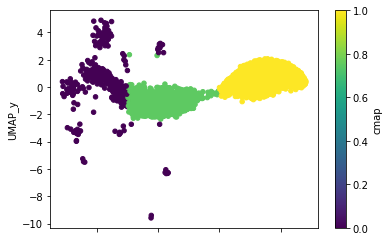

In [149]:
sim_umap_df.plot.scatter(x='UMAP_x',
                         y='UMAP_y',
                         c='cmap',
                         colormap='viridis'
                        )

In [153]:
AON_blob_list = sim_umap_df.index[sim_umap_df['blob'] == 'AON-blob'].tolist()
PCX_blob_list = sim_umap_df.index[sim_umap_df['blob'] == 'PCX-blob'].tolist()
non_blob_list = sim_umap_df.index[sim_umap_df['blob'] == 'non-blob'].tolist()

In [151]:
tfs = []
for regulon in regulons:
    if regulon.transcription_factor in sim_ex_mtx.columns:
        tfs.append(regulon.transcription_factor)

In [102]:
len(tfs)

111

In [152]:
sim_ex_mtx.loc[AON_blob_list,tfs]

Alx3  Arid5b  Arnt  Atf2  Atf4  Bach2  Barx1  Bcl11a  Bclaf1  Bmyc  ...  \
55       0       0     0     0     0      0      0       0       0     0  ...   
169      0       0     0     0     0      0      0       0       0     0  ...   
249      0       0     0     0     0      0      0       0       0     0  ...   
251      0       0     0     0     0      0      0       0       0     0  ...   
272      0       0     0     0     0      0      0       0       0     0  ...   
...    ...     ...   ...   ...   ...    ...    ...     ...     ...   ...  ...   
2995     0       0     0     0     0      0      0       0       0     0  ...   
2996     0       0     0     0     0      0      0       0       0     0  ...   
2997     0       0     0     0     0      0      0       0       0     0  ...   
2998     0       0     0     0     0      0      0       0       0     0  ...   
2999     0       0     0     0     0      0      0       0       0     0  ...   

      Usf1  Usf2  Vax1  Yy1  Zfp110  Zfp143  Zfp398  Zfp467  Zfp523  Zic1  
55       0     0     0    0       0       0       0       0       0     0  
169      0     0     0    0       0       0       0       0       1     0  
249      0     0     0    0       0       0       0       0       0     0  
251      0     0     0    0       0       0       0       0       0     0  
272      0     0     0    0       0       0       0       0       0     0  
...    ...   ...   ...  ...     ...     ...     ...     ...     ...   ...  
2995     0     0     0    0       0       0       0       0       0     0  
2996     0     0     0    0       0       0       0       0       0     0  
2997     0     0     0    0       0       0       0       0       0     0  
2998     0     1     0    0       0       0       0       0       0     0  
2999     0     0     0    0       0       0       0       0       0     0  

[1097 rows x 125 columns]

In [ ]:
sns.heatmap(sim_ex_mtx.loc[blob_df.sample(50).index,tfs])

In [ ]:
sns.heatmap(sim_ex_mtx.loc[not_blob_df.sample(50).index,tfs])

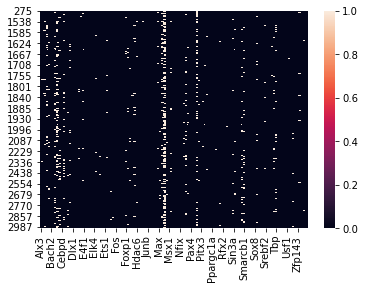

In [154]:
sns.heatmap(sim_ex_mtx.loc[non_blob_list,tfs])

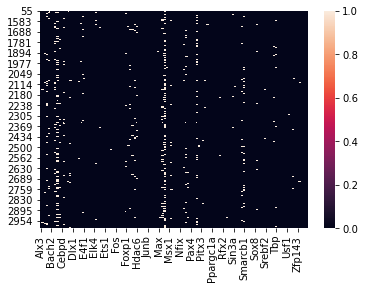

In [155]:
sns.heatmap(sim_ex_mtx.loc[AON_blob_list,tfs])

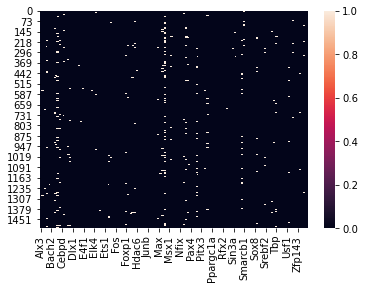

In [157]:
sns.heatmap(sim_ex_mtx.loc[PCX_blob_list,tfs])

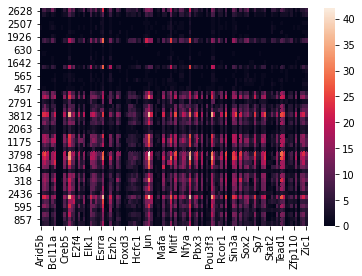

In [128]:
#non-blob sorted by most left
left_df = not_blob_df.sort_values(by='UMAP_x').iloc[0:50]
sns.heatmap(sim_ex_mtx.loc[left_df.index,tfs])


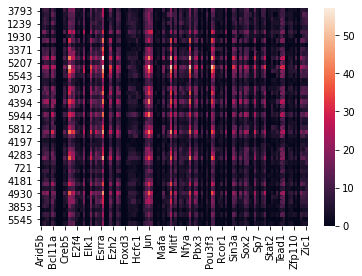

In [130]:
#non-blob sorted by most left
bottom_df = not_blob_df.sort_values(by='UMAP_y').iloc[0:50]
sns.heatmap(sim_ex_mtx.loc[bottom_df.index,tfs])


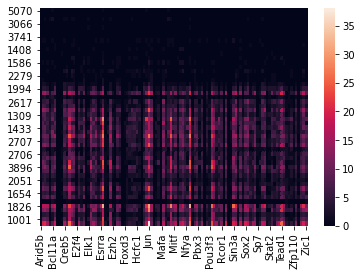

In [131]:
#non-blob sorted by most left
top_df = not_blob_df.sort_values(by='UMAP_y', ascending=False).iloc[0:50]
sns.heatmap(sim_ex_mtx.loc[top_df.index,tfs])
